In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy as sp
from scipy import stats as scs
from scipy.stats import chi2_contingency

Please note that for the questions involving random number generators or sampling, your answer might differ a little from those provided in the examples. For such questions, you should use the values in the examples as a reference and not try to match exactly with them. 

## Q1 (2 pts)

(a) Consider the data in the file 'iris_imbalanced.csv'. It contains a column 'Class', which is the class label with three discrete values (0/1/2). Create a bar plot showing the number of examples for each class. 

2    75
1    50
0    20
Name: Class, dtype: int64


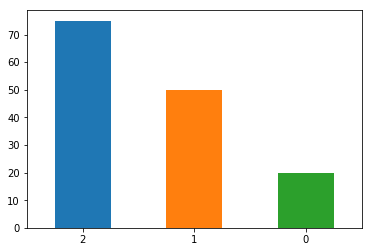

In [12]:
data = pd.read_csv('iris_imbalanced.csv')
class_value = data['Class'].value_counts()
print(class_value)
class_value.plot(kind='bar', rot=0)
plt.show()

(b) Write a method to analytically (i.e., using scipy.stats.norm.interval) calculate a confidence interval of the mean for the specified column.

In [40]:
# calculateCI(filename, attribute, ciPercent) takes as input the filename to read in 
# data from, attribute (string) as the column, and CI percentage. Returns the 
# calculated CI as a tuple. 
#


def calculateCI(filename, attribute, ciPercent):
    
    data = pd.read_csv(filename)
    column = data[attribute].tolist()
    mean, sigma = np.mean(column), np.std(column)
    CI = scs.norm.interval(ciPercent, loc=mean, scale=sigma/np.sqrt(len(column)-1))
    return(CI)
    
# For example,
calculateCI('iris_imbalanced.csv', 'Sepal Width', 0.95)
# -> (2.97485548067057, 3.1161790020880513)



(2.97485548067057, 3.1161790020880513)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Write a method that uses bootstrap resampling to calculate a confidence interval of the mean for the specified column, using the specified number of trials. In other words, repeatedly sample with replacement (where the sample size id the length of column) and recalculate the mean, then compute the confidence interval from the empirical distribution of resampled means. 

In [136]:
# calculateCIBootstrap(filename, attribute, ciPercent, numTrials) takes as input 
# the filename to read in data from, attribute (string) as the column, the CI 
# percentage, and number of trials for estimation. Returns the calculated CI as a tuple. 
#

def calculateCIBootstrap(filename, attribute, ciPercent, numTrials):
    
    num_Trials = numTrials
    data = pd.read_csv(filename)
    dB = data[attribute]
    numExample = len(dB)
    dBmeans = []
    for i in range(numTrials):
        # sample with replacement
        tmpB = data[attribute].sample(numExample,replace=True)
        dBmeans.append(tmpB.mean())
    mean, sigma = np.mean(dBmeans), np.std(dBmeans)
    CI = scs.norm.interval(ciPercent, loc=mean, scale=sigma/np.sqrt(len(dBmeans)-1))
    return(CI)

# For example,
calculateCIBootstrap('iris_imbalanced.csv', 'Sepal Width', 0.95, 100)
# varies, but around -> (2.984189655172414, 3.1090689655172414)


(3.0382769260937477, 3.054454108389011)

(d) Now, repeat Q1c but instead of creating a boostrap resample with the same size as the dataset, only sample the specified number of examples. Explore the difference that sample size and number of trials makes on the estimated confidence interval.

In [142]:
# calculateCIBootstrapSize(filename, attribute, ciPercent, numTrials, sampleSize) takes 
# as input the filename to read in data from, attribute (string) as the column, the CI 
# percentage, number of trials for estimation, and sample size. Returns the calculated 
# CI as a tuple. 
#

def calculateCIBootstrapSize(filename, attribute, ciPercent, numTrials, sampleSize):

    
    num_Trials = numTrials
    data = pd.read_csv(filename)
    dB = data[attribute]
    numExample = len(dB)
    dBmeans = []
    for i in range(numTrials):
        # sample with replacement
        tmpB = data[attribute].sample(sampleSize,replace=True)
        dBmeans.append(tmpB.mean())
    mean, sigma = np.mean(dBmeans), np.std(dBmeans)
    CI = scs.norm.interval(ciPercent, loc=mean, scale=sigma/np.sqrt(len(dBmeans)-1))
    return(CI)
    
# For example,
calculateCIBootstrapSize('iris_imbalanced.csv', 'Sepal Width', 0.95, 100, 25)
# varies but around -> (2.8796, 3.2001999999999997)

(3.0312779439046795, 3.0647220560953206)

## Q2 (3 pts)

(a) Consider the event of rolling a six-sided die. Randomly simulate this event 1000 times and plot a histogram of results for each number on the dice (use number of bins=6).

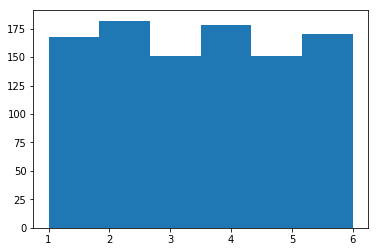

In [47]:
import random


diceList = [random.randint(1, 6) for _ in range(0, 1000)]

DF = pd.DataFrame(diceList)[0]
plt.hist(DF, bins=6)
plt.show()


(b) Write a method to use the same random simulation and return the empirical probability of getting a value greater than or equal to the specified target value (e.g., >=5).

In [32]:
# calculateDiceRollProb(numTrials, targetValue) takes as input the number of 
# trials for estimation and the target value. 
# Returns the empirical probability of getting a value >= the specified target value. 
#

def calculateDiceRollProb(numTrials, targetValue):
    
    num_Trials = numTrials
    
    diceList = [random.randint(1, 6) for _ in range(0, num_Trials)]
    diceArray = np.array(diceList)
    target = diceArray[diceArray >= targetValue]
    return(len(target)/num_Trials)
    
    
    
# For example,
calculateDiceRollProb(1000, 4)
# varies, but around -> 0.5

0.501

(c) Now consider the event where you roll multiple dice and take the max value observed. Write a function that randomly simulate this event multiple times and returns the maximum value obtained in each trial. 

In [44]:
# get_max_values(num_trials, num_dice) takes as input the number of trials and the 
# number of dice to be rolled simultaneously, and returns a list of maximum value 
# obtained in each trial as a pandas DataFrame.


import random
def get_max_values(num_trials, num_dice):
    trial_list=[]
    min = 1
    max = 6
    for i in range (1,num_trials+1):
        m=0
        for j in range(1,num_dice+1):
            k = random.randint(min, max)
            if m<k:
                m=k
        trial_list.append(m)
    return(trial_list)


get_max_values(3, 5)
# Varies, expect lots of 6's and 5's, example ->  [6,5,5]


[6, 5, 5]

(d) Use the method from Q2c to simulate 1000 trials with 10 dice. Plot a histogram of resulting max values (use number of bins=6).

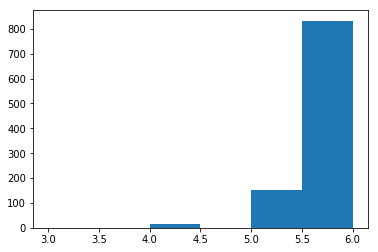

In [46]:
num_trials = 1000
num_dice = 10

result_list = get_max_values(num_trials, num_dice)
plt.hist(result_list, bins=6)
plt.show()

(e) Write a function that uses the method from Q2c to simulate multiple trials of rolling several dice and taking the max. Calculate the empirical probability of getting a max value greater than or equal to the specified target value (e.g., >=5).

In [56]:
# calculateMaxDiceRollProb(num_trials, num_dice, target_value) takes as input the 
# number of trials, the number of dice to be rolled simultaneously, and the target 
# value. Returns the empirical probability of getting a max value >=target value.



def calculateMaxDiceRollProb(num_trials, num_dice, target_value):
    trial_list=[]
    min = 1
    max = 6
    for i in range (1,num_trials+1):
        m=0
        for j in range(1,num_dice+1):
            k = random.randint(min, max)
            if m<k:
                m=k
        trial_list.append(m)
    allQs = np.array(trial_list)
    sigQs = allQs[allQs >= target_value]
    return(len(sigQs)/num_trials)
    
# calculateMaxDiceRollProb(1000, 10, 6)

# For example,
calculateMaxDiceRollProb(1000, 10, 6)
# varies, near -> 0.838

0.837

## Q3 (4 pts)

Consider the AB test results in the csv file 'ab_data.csv'. The data consists of 2000 users. The column 'group' indicates whether the user is assigned to the control group (A) or the treatment group (B). The column 'premium_signed_up' indicates whether the user signed up for the premium service or not with a 1 or 0, respectively. 

(a) Calculate the difference in means between group A and B for the 'premium_signed_up' attribute.

In [65]:
data = pd.read_csv('ab_data.csv')
groupmean = data.groupby('group')[ 'premium_signed_up' ].mean()
diff = groupmean[0]-groupmean[1]
print(diff)

0.08771215329263711


(b) Apply randomization testing to calculate an empirical distribution in the difference in means between the two groups. Specifically, randomly permute the assignment of group A/B for given number of trials and calculate difference in means between the two groups. Repeatedly do this to estimate a null distribution. Return the resulting difference obtained for each trial as a pandas dataframe.

In [92]:
# calculateEmpiricalDiffMeans(num_permutation_trials) takes as input the number of permutation trials.
# Returns the difference in means between the A and B groups obtained for each trial as a pandas dataframe. 


def calculateEmpiricalDiffMeans(num_permutation_trials):
    
    trials = num_permutation_trials
    data = pd.read_csv('ab_data.csv')
    dShape = data.group.values
    diffQs = []
    for i in range(trials):
        # randomly split data into two groups
        np.random.shuffle(dShape)
        data['group'] = dShape
        groupmean = data.groupby('group')[ 'premium_signed_up' ].mean()
        diff = groupmean[0]-groupmean[1]
        diffQs.append(diff)
    DF = pd.DataFrame(diffQs)
    return(DF)
    

# For example,
calculateEmpiricalDiffMeans(100) # -> (100 x 1 Pandas Dataframe)

,0
0,-0.012291
1,-0.015291
2,0.003710
3,0.004710
4,0.005710
5,0.010710
6,-0.000291
7,0.022710
8,-0.002291
9,0.007710


(c) Use the method from Q3b and plot the results of 100 permutation trials as a histogram.

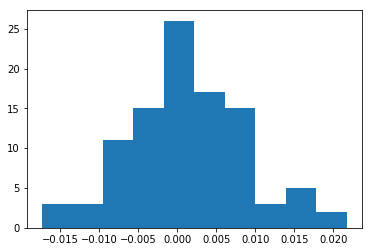

In [98]:
num_permutation_trials = 100
result = calculateEmpiricalDiffMeans(num_permutation_trials)
plt.hist(result[0])
plt.show()


(d) Use the observed difference calculated in Q3a, and the method from Q3b, to conduct a hypothesis test to determine whether the observed difference is significant. Specifically, determine the empirical probability of observing the observed difference under the null hypothesis. 

In [6]:
# testSignificanceDiffMeans(numTrials, alpha) takes as input the number of trials, and the significance level alpha.
# Returns a tuple with the first element as:
# the empirical probability of observing the observed difference under the null hypothesis, and
# the second element as the decision to "accept" or "reject" the hypothesis. 

data = pd.read_csv('ab_data.csv')
groupmean = data.groupby('group')[ 'premium_signed_up' ].mean()
observed_diff = groupmean[0]-groupmean[1]

def testSignificanceDiffMeans(numTrials, alpha):
    
    trials = numTrials
    data = pd.read_csv('ab_data.csv')
    dShape = data.group.values
    diffQs = []
    for i in range(trials):
        # randomly split data into two groups
        np.random.shuffle(dShape)
        data['group'] = dShape
        groupmean = data.groupby('group')[ 'premium_signed_up' ].mean()
        diff = groupmean[0]-groupmean[1]
        diffQs.append(diff)
    allQs = np.array(diffQs)
    sigQs = allQs[allQs == observed_diff]
    probab = len(sigQs)/trials
    if probab < alpha:
        result = "reject"
    else:
        result = "accept"
    return(probab, result)
    
        

    
# For example,
testSignificanceDiffMeans(100, 0.1)
# -> (0.0, 'reject')


(0.0, 'reject')

## Q4 (3 pts)

(a) Consider the data in the files 'over_50.csv' and 'under_50.csv', about the number of hours of exercise per week and the probability of developing a disease, for two groups of patients, those below the age of 50 and those over the age of 50, respectively.

Create two labeled scatter plots (one for each dataset) with 'Hours Exercised' on the x axis and 'probability' on the y-axis. 

In [7]:
over_50 = pd.read_csv("over_50.csv")
under_50 = pd.read_csv("under_50.csv")
print(over_50.head())

   age  Hours Exercised  probability
0   69         4.942730    45.387645
1   73         7.618908    37.596694
2   61         5.202786    43.797262
3   84         4.700312    53.748417
4   82         4.002622    52.033043


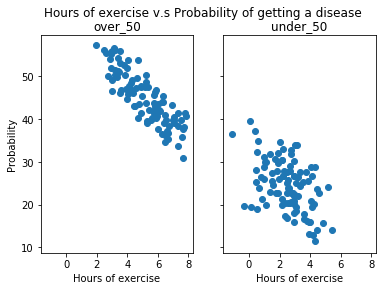

In [30]:
over_50 = pd.read_csv("over_50.csv")
under_50 = pd.read_csv("under_50.csv")

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('Hours of exercise v.s Probability of getting a disease')

ax1.scatter(over_50['Hours Exercised'], over_50['probability'])
ax1.set_title('over_50')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Hours of exercise')

ax2.scatter(under_50['Hours Exercised'], under_50['probability'])
ax2.set_title('under_50')
ax2.set_xlabel('Hours of exercise')

plt.show()

(b) Calculate the correlation between the 'Hours Exercised' and 'probability' for the two datasets. 

In [44]:
col1 = over_50['Hours Exercised']
col2 = over_50['probability']
over_50_correlation = col1.corr(col2)

colb1 = under_50['Hours Exercised']
colb2 = under_50['probability']
under_50_correlation = colb1.corr(colb2)
print('over_50_correlation' + ' = ' + str(over_50_correlation) + " ; " + 'under_50_correlation' + ' = ' + str(under_50_correlation))


over_50_correlation = -0.8574318141725066 ; under_50_correlation = -0.4766996516261135


(c) Now, combine the data in the two files (you can use the concat() function in pandas to concatenate two dataframes). Create a scatter plot with 'Hours Exercised' on the x axis and 'probability' on the y-axis.

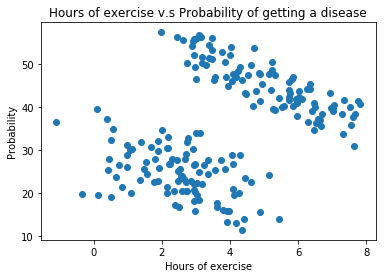

In [50]:
data = pd.concat([over_50, under_50])

fig, ax = plt.subplots()

ax.scatter(data['Hours Exercised'], data['probability'])
ax.set_title('Hours of exercise v.s Probability of getting a disease')
ax.set_ylabel('Probability')
ax.set_xlabel('Hours of exercise')
plt.show()

(d) Compute the correlation between the 'Hours Exercised' and 'probability' for the combined data. 

In [52]:
col1 = data['Hours Exercised']
col2 = data['probability']
data_correlation = col1.corr(col2)
print(data_correlation)


0.32863439089294455


(e) Discuss how Simpson's Paradox has occured in this data by considering your results above. 

#### When the data is splitted into two groups of patients, those below the age of 50 and those over the age of 50, there is a negative correlation between the 'Hours Exercised' and 'probability'  in both group. However, when the data was aggregated, there is reversed trend showing a positive correlation.

### YOUR ANSWER HERE: 

  

## Q5: Ethical issues in Data Science (4 pts)

Find one example of a data science application in a recent news article, where privacy and/or bias issues have been identified, and briefly write the answer for the following questions. 

(a) A brief summary (1-2 sentences) of the article and a reference.

### YOUR ANSWER HERE: 



#### The article is about data selection bias in the vocie recognization technology that leads to the unfairness.
https://hbr.org/2019/05/voice-recognition-still-has-significant-race-and-gender-biases

(b) Identify the data analysis task in the application and describe the data that was analyzed.

### YOUR ANSWER HERE: 

  

#### The article provides a thought of the experiment:

Consider three Americans who all speak English as a first language. Say my friend Josh and I both use Google speech recognition. He might get 92% accuracy and I would get 79% accuracy. We’re both white. If we read the same paragraph, he would need to fix about 8% of the transcription and I’d need to fix 21%. My mixed-race female friend, Jada, is likely to get 10% lower accuracy than me.  So, our scorecard would look something like:

Josh (white male) = A-, 92%

Joan (white female) = C+, 79%

Jada (mixed race female) = D+, 69%

(c) State the privacy/fairness issues that were identified.

#### Google’s speech recognition is more accurate for men than it is for women. It is also more accurate for white than it is for other races.

### YOUR ANSWER HERE: 

  

(d) Discuss what aspect of the data/analysis is likely the root cause of the issue. (If this aspect is not discussed, just speculate yourself.)

### YOUR ANSWER HERE: 

  

#### The underlying reason may be that databases have lots of white male data, and less data on female and minority voices.